In [1]:
#Importing libraries and dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
idata = pd.read_csv('data/Internet_Firewall.csv')

idata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
Source Port             65532 non-null int64
Destination Port        65532 non-null int64
NAT Source Port         65532 non-null int64
NAT Destination Port    65532 non-null int64
Action                  65532 non-null object
Bytes                   65532 non-null int64
Bytes Sent              65532 non-null int64
Bytes Received          65532 non-null int64
Packets                 65532 non-null int64
Elapsed Time (sec)      65532 non-null int64
pkts_sent               65532 non-null int64
pkts_received           65532 non-null int64
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [3]:
idata.head(5)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [4]:
idata.describe(include ="all")

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,65532,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
unique,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,allow,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,37640,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49391.969343,10577.385812,19282.972761,2671.049930,NaN,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,NaN,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,NaN,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,NaN,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,NaN,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,NaN,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000


In [5]:
idata.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [6]:
idata['Action'].unique()

array(['allow', 'drop', 'deny', 'reset-both'], dtype=object)

<function matplotlib.pyplot.show(*args, **kw)>

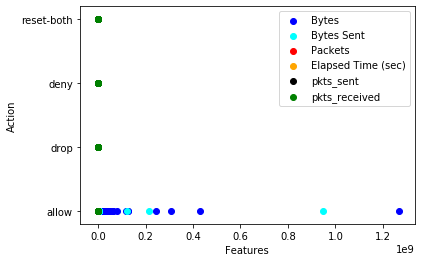

In [7]:
# Visualizing a Subset of our data - important features
plt.xlabel("Features")
plt.ylabel("Action")

pltx = idata.loc[:, 'Bytes']
plty = idata.loc[:, 'Action']
plt.scatter(pltx, plty, color='blue', label= 'Bytes')

pltx = idata.loc[:, 'Bytes Sent']
plty = idata.loc[:, 'Action']
plt.scatter(pltx, plty, color='cyan', label= 'Bytes Sent')

pltx = idata.loc[:, 'Packets']
plty = idata.loc[:, 'Action']
plt.scatter(pltx, plty, color='red', label= 'Packets')

pltx = idata.loc[:, 'Elapsed Time (sec)']
plty = idata.loc[:, 'Action']
plt.scatter(pltx, plty, color='orange', label= 'Elapsed Time (sec)')

pltx = idata.loc[:, 'pkts_sent']
plty = idata.loc[:, 'Action']
plt.scatter(pltx, plty, color='black', label= 'pkts_sent')

pltx = idata.loc[:, 'pkts_received']
plty = idata.loc[:, 'Action']
plt.scatter(pltx, plty, color='green', label= 'pkts_received')

plt.legend(loc=1, prop={'size':10})
plt.show

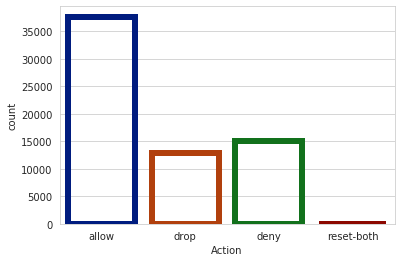

In [8]:
# Visualizing the Dependent variable (Action) unique values
sns.set_style(style="whitegrid")
sns.countplot(x='Action', data=idata,facecolor=(0, 0, 0, 0),linewidth=6,edgecolor=sns.color_palette("dark", 4))
              #, palette='Set2'
plt.show()

In [9]:
# Dataset Features Correlation
idata.corr()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
Source Port,1.000000,-0.332246,0.145391,-0.024843,0.000221,-0.000931,0.001950,-0.001742,-0.046515,-0.001422,-0.001962
Destination Port,-0.332246,1.000000,-0.281676,0.410042,-0.005297,0.001675,-0.014684,-0.006063,0.023537,-0.002134,-0.010909
NAT Source Port,0.145391,-0.281676,1.000000,0.178435,0.010659,0.002242,0.020827,0.012633,0.141485,0.007180,0.018772
NAT Destination Port,-0.024843,0.410042,0.178435,1.000000,0.003975,0.007904,-0.003216,0.004605,0.219776,0.006136,0.001747
Bytes,0.000221,-0.005297,0.010659,0.003975,1.000000,0.933462,0.830225,0.974379,0.148834,0.966548,0.850209
Bytes Sent,-0.000931,0.001675,0.002242,0.007904,0.933462,1.000000,0.575047,0.887596,0.126039,0.973976,0.639098
Bytes Received,0.001950,-0.014684,0.020827,-0.003216,0.830225,0.575047,1.000000,0.843067,0.143601,0.690959,0.946039
Packets,-0.001742,-0.006063,0.012633,0.004605,0.974379,0.887596,0.843067,1.000000,0.147074,0.961286,0.916978
Elapsed Time (sec),-0.046515,0.023537,0.141485,0.219776,0.148834,0.126039,0.143601,0.147074,1.000000,0.135101,0.143954
pkts_sent,-0.001422,-0.002134,0.007180,0.006136,0.966548,0.973976,0.690959,0.961286,0.135101,1.000000,0.771550


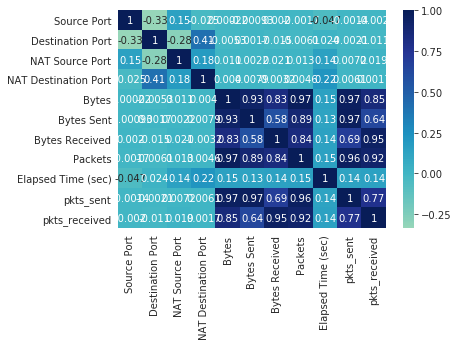

In [10]:
ht = sns.heatmap(idata.corr(),center=0, annot=True, cmap="YlGnBu")

In [11]:
# Spliting the dataset

X = idata.drop(['Action'], axis=1)
y = idata['Action']

In [12]:
# Feature Selection
from sklearn.tree import DecisionTreeClassifier

df = DecisionTreeClassifier(random_state=15, criterion='gini',  max_depth=10)
df.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=15, splitter='best')

In [13]:
for i,column in enumerate(idata.drop('Action',axis=1)):
    print('The Impotant Variable for {} is : {}'.format(column, df.feature_importances_[i]))


The Impotant Variable for Source Port is : 0.000709441584774285
The Impotant Variable for Destination Port is : 0.36538440678672546
The Impotant Variable for NAT Source Port is : 5.2672367312753435e-05
The Impotant Variable for NAT Destination Port is : 0.0003890450193936749
The Impotant Variable for Bytes is : 0.0007133899941219098
The Impotant Variable for Bytes Sent is : 0.0001280113865340411
The Impotant Variable for Bytes Received is : 0.00029097108647619074
The Impotant Variable for Packets is : 0.012046650549176677
The Impotant Variable for Elapsed Time (sec) is : 0.6200143070059122
The Impotant Variable for pkts_sent is : 0.0002711042195727853
The Impotant Variable for pkts_received is : 0.0


In [14]:
#Split the data into training 80% and testing 20% sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0,
                                                   test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(52425, 11)
(13107, 11)
(52425,)
(13107,)


In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='sag',tol=0.01,random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [17]:
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.01, verbose=0,
                   warm_start=False)

In [18]:
model.intercept_

array([ 2.04251359, -0.11436066, -0.43297761, -1.49517533])

In [19]:
model.coef_

array([[-1.17609908e-01, -9.95003045e-01,  1.90962068e+00,
         8.03552524e-01,  1.28849663e-02, -8.07226281e-03,
         4.22505746e-02,  1.84825668e-02,  5.38890409e-01,
         5.63389325e-03,  3.46240648e-02],
       [-4.32531807e-01,  1.67807806e+00, -9.30481595e-01,
        -6.84520978e-01, -1.05475880e-02, -6.49553949e-04,
        -2.32083437e-02, -1.33135613e-02, -2.81069673e-01,
        -7.05946604e-03, -2.05723470e-02],
       [ 6.56897632e-01, -8.79295226e-01, -1.31268268e+00,
        -1.86159702e-01, -1.49272513e-02,  8.69199008e-04,
        -3.56489657e-02, -1.88431606e-02, -3.54065272e-01,
        -9.10832569e-03, -3.04023174e-02],
       [-1.06755916e-01,  1.96220215e-01,  3.33543602e-01,
         6.71281566e-02,  1.25898730e-02,  7.85261775e-03,
         1.66067347e-02,  1.36741551e-02,  9.62445361e-02,
         1.05338985e-02,  1.63505996e-02]])

In [20]:
# Create Y Predict
y_pred = model.predict(X_test_scaled)
y_pred[:20]

array(['allow', 'drop', 'allow', 'deny', 'drop', 'deny', 'drop', 'allow',
       'drop', 'deny', 'allow', 'allow', 'deny', 'allow', 'allow', 'drop',
       'deny', 'allow', 'deny', 'allow'], dtype=object)

In [21]:
print(y_test.shape)
test=y_test.values.reshape(1,13107)

(13107,)


In [22]:
datatest = pd.DataFrame({"Actual":test.flatten(), "Predicted":y_pred.flatten()})
datatest.head(10)

,Actual,Predicted
0,allow,allow
1,drop,drop
2,allow,allow
3,deny,deny
4,drop,drop
5,allow,deny
6,deny,drop
7,allow,allow
8,drop,drop
9,deny,deny


In [23]:
#datatest.tail(10).plot(kind ="bar")
#plt.title("Actions: Actual vs Predicted") 
#plt.show()

In [24]:
# Accuracy Score 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("The Testing Accuracy is : ", accuracy_score(y_test, y_pred))
print("The Training Accuracy is : ", model.score(X_train_scaled, y_train))

The Testing Accuracy is :  0.9317158770122835
The Training Accuracy is :  0.928621840724845


In [25]:
# Classification Report
print(classification_report(y_test,y_pred))

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      0.93      0.96      7522
        deny       0.98      0.87      0.92      2989
        drop       0.76      1.00      0.87      2589
  reset-both       0.00      0.00      0.00         7

    accuracy                           0.93     13107
   macro avg       0.68      0.70      0.69     13107
weighted avg       0.94      0.93      0.93     13107



In [26]:
# Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[7028   58  436    0]
 [  31 2595  363    0]
 [   0    0 2589    0]
 [   1    6    0    0]]


In [27]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="BuPu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':10})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted label')

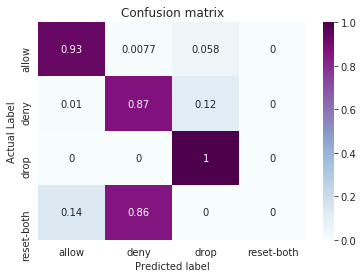

In [28]:
# Visualizing Confusion Matrix

cm = confusion_matrix(y_test,y_pred)
cm_per = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_per, classes = model.classes_, title='Confusion matrix')

In [29]:
#k-fold cross-validation score
from sklearn.model_selection import cross_val_score
cvs_lor = cross_val_score(model, X_train_scaled, y_train, cv=4).mean()
print("K-fold cross validation:", cvs_lor)

K-fold cross validation: 0.9294801409814402


In [33]:
# Grid Search CV

params = {
          "penalty": ['l1', 'l2', 'elasticnet', 'none'], 
          "tol": [0.0001, 0.001, 0.01, 0.1],
          "C": [1,5,10,15,20,25],
          "intercept_scaling": [1, 2, 3, 4],
          "solver": ['sag', 'saga'],
          "random_state": [0,10,20]
         }


from sklearn.model_selection import GridSearchCV
grid_lor = GridSearchCV(estimator=LogisticRegression(), 
                       param_grid=params,
                       cv=4,
                       n_jobs=2,
                       scoring="accuracy"
                      )

In [ ]:
grid_lor.fit(X_train, y_train)

In [ ]:
grid_lor.best_params_

In [ ]:
print("Logistic Regression Best Score:", grid_lor.best_score_)

In [ ]:
# Logistic Regression k-fold cross-validation score
from sklearn.model_selection import cross_val_score
print(" Logistic Regression K-fold cross validation:", cross_val_score(grid_lor, X_train_scaled, y_train, cv=4).mean()) 
cvs_lor_Grid = cross_val_score(grid_lr, X_train_scaled, y_train, cv=4).mean()

In [33]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier


test_score = []
train_score = []

for i in range(1,11):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

In [34]:
max_train_score = max(train_score)
train_scores_ind = [i for i, v in enumerate(train_score) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))


Max train score 99.9580352885074 % and k = [1]
Max test score 99.46593423361563 % and k = [3]


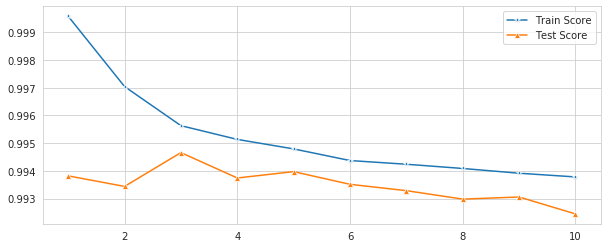

In [35]:
## Visualisation train and test sets
plt.figure(figsize=(10,4))
p = sns.lineplot(range(1,11),train_score,marker='*',label='Train Score')
p = sns.lineplot(range(1,11),test_score,marker='^',label='Test Score')


In [36]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [37]:
# for no.of nighbors from 1 -16, graph the k_fold scores
knn = KNeighborsClassifier()

nighb = []
max = 0
k = 0

for i in range(1,16,1):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    score = cross_val_score(knn, X, y, cv=4).mean()
    if max < score:
        max = score 
        k = i
    nighb.append(score)

print('The Optimal K :', k)    
nighb

The Optimal K : 9


[0.9907526094121956,
 0.9906915705304279,
 0.9925227369834585,
 0.9929500091558322,
 0.9933620216077641,
 0.9933467618873222,
 0.9933315021668803,
 0.9933467618873222,
 0.9934230604895318,
 0.9933772813282061,
 0.9933315021668804,
 0.9933467618873223,
 0.9933620216077642,
 0.9933315021668804,
 0.9931026063602515]

Text(0, 0.5, 'K-fold Scores')

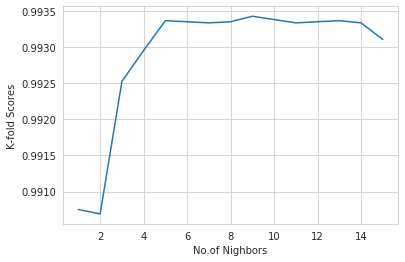

In [38]:
plt.plot(range(1,16,1), nighb)
plt.xlabel('No.of Nighbors')
plt.ylabel('K-fold Scores')

In [39]:
knn.fit(X_train,y_train)
print("KNN Train Score :",knn.score(X_train,y_train))
print("KNN Test Score :",knn.score(X_test,y_test))

KNN Train Score : 0.9997329518359561
KNN Test Score : 0.9933623254749371


In [40]:
#KNN K-fold Cross validation
from sklearn.model_selection import cross_val_score
#print("KNN K-fold cross validation:" , cross_val_score(knn,X_train,y_train,cv=4).mean())
print("KNN K-fold cross validation:" , cross_val_score(knn,X,y,cv=4).mean())
cvs_knn = cross_val_score(knn,X,y,cv=4).mean()

KNN K-fold cross validation: 0.9931026063602515


In [41]:
#KNN CM C_report

y_pred_knn = knn.predict(X_test)
print("KNN Confusion Matrix \n\n",confusion_matrix(y_test,y_pred_knn),"\n\n")

print("\t KNN Classification Report \n\n", classification_report(y_test,y_pred_knn))

KNN Confusion Matrix 

 [[7472   46    4    0]
 [  20 2960    8    1]
 [   0    1 2588    0]
 [   2    5    0    0]] 


	 KNN Classification Report 

               precision    recall  f1-score   support

       allow       1.00      0.99      1.00      7522
        deny       0.98      0.99      0.99      2989
        drop       1.00      1.00      1.00      2589
  reset-both       0.00      0.00      0.00         7

    accuracy                           0.99     13107
   macro avg       0.74      0.75      0.74     13107
weighted avg       0.99      0.99      0.99     13107



In [42]:
# Random forest Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  GridSearchCV
params_rf = {'n_estimators': [40,60,80,100,120]}
rf = GridSearchCV(RandomForestClassifier(),param_grid=params_rf,cv=4)
rf.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [43]:
rf.best_params_

{'n_estimators': 120}

In [44]:
print("Random Forest Best Score:",rf.best_score_)
print("Random Forest test Score:",rf.score(X_test, y_test))

Random Forest Best Score: 0.9977873137544457
Random Forest test Score: 0.9986266880292973


In [45]:
# Random Forest K-fold Cross validation
from sklearn.model_selection import cross_val_score
cvs_rf = cross_val_score(rf,X,y,cv=4).mean()
print("Random Forest K-fold cross validation:" , cvs_rf)

Random Forest K-fold cross validation: 0.9828480742232802


In [46]:
# Random Forest CM C_report

y_pred_rf = rf.predict(X_test)
print("Random Forest Confusion Matrix \n\n", confusion_matrix(y_test,y_pred_rf),"\n\n")

print("\t Random Forest Classification Report \n\n",classification_report(y_test,y_pred_rf))

Random Forest Confusion Matrix 

 [[7519    3    0    0]
 [   0 2983    5    1]
 [   0    4 2585    0]
 [   0    5    0    2]] 


	 Random Forest Classification Report 

               precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7522
        deny       1.00      1.00      1.00      2989
        drop       1.00      1.00      1.00      2589
  reset-both       0.67      0.29      0.40         7

    accuracy                           1.00     13107
   macro avg       0.92      0.82      0.85     13107
weighted avg       1.00      1.00      1.00     13107



In [47]:
# AdaBoost Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
params = {
            'base_estimator': [
                               DecisionTreeClassifier(max_depth=1),
                               DecisionTreeClassifier(max_depth=5),
                               DecisionTreeClassifier(max_depth=10)
                              ],
            'n_estimators': [20,40,60,80,100]
            }
ada = GridSearchCV(AdaBoostClassifier(),param_grid=params,cv=4)
ada.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                   class_weight=None,
                                                                   criterion='gini',
                                                                   max_depth=1,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_...
                                                               

In [48]:
ada.best_params_

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=10, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'n_estimators': 80}

In [49]:
print("Adaboost Best Score:", ada.best_score_)
print("Adaboost test Score:", ada.score(X_test, y_test))

Adaboost Best Score: 0.9980352888690837
Adaboost test Score: 0.9988555733577478


In [50]:
# AdaBoost K-fold Cross validation
from sklearn.model_selection import cross_val_score
cvs_ada = cross_val_score(ada,X,y,cv=4).mean()
print("AdaBoost K-fold cross validation:" , cvs_ada)

AdaBoost K-fold cross validation: 0.994750656167979


In [51]:
# Adaboost CM C_report 

y_pred_ada = ada.predict(X_test)
print("AdaBoost Confusion Matrix \n\n", confusion_matrix(y_test,y_pred_ada),"\n\n")

print("\t AdaBoost Classification Report \n\n",classification_report(y_test,y_pred_ada))

AdaBoost Confusion Matrix 

 [[7519    3    0    0]
 [   0 2983    5    1]
 [   0    3 2586    0]
 [   0    3    0    4]] 


	 AdaBoost Classification Report 

               precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7522
        deny       1.00      1.00      1.00      2989
        drop       1.00      1.00      1.00      2589
  reset-both       0.80      0.57      0.67         7

    accuracy                           1.00     13107
   macro avg       0.95      0.89      0.92     13107
weighted avg       1.00      1.00      1.00     13107



In [ ]:
 # Support Vector Classification SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params_dictionary = {
                        'C' : [1, 10],
                        'kernel': ['linear',  'rbf'], #,'poly', 'sigmoid'
                        'degree': [2,3]
                        #'gamma' : [0.0003, 0.003,0.03, 0.3, 1.0] 
                    }

param_grid = {'C':[0.1, 1, 10], 'kernel':['linear','poly','rbf','sigmoid'], degree:[1,2,3]}

svc_model = GridSearchCV(SVC(),param_grid=params_dictionary,cv=4)
svc_model.fit(X_train, y_train)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10], 'kernel':['linear','poly','rbf','sigmoid'], degree:[1,2,3]}

svc_model = GridSearchCV(SVC(),param_grid)
svc_model.fit(X_train, y_train)

In [ ]:
svc_model.best_params_

In [ ]:
svc_model.best_estimator_

In [ ]:
print("SVC Best Score: ", svc_model.best_score_)
print("SVC test Score:", svc_model.score(X_test, y_test))

In [ ]:
SVC K-fold Cross validation
from sklearn.model_selection import cross_val_score
cvs_svc = cross_val_score(svc_model,X,y,cv=4).mean()
print("SVC K-fold cross validation:" , cvs_svc)

In [37]:
# try another way
from sklearn.svm import SVC

ker = ['linear','rbf','poly', 'sigmoid']

for i in ker:
    svc_model = SVC(kernel=i)
    svc_model.fit(X_train, y_train)
    print("Kernal:", i)
    print("SVC train Score: ", svc_model.score(X_train, y_train))
    print("SVC test Score:  ", svc_model.score(X_test, y_test))

Kernal: linear
SVC train Score:  0.9914163090128756
SVC test Score:   0.9929045548180362
Kernal: rbf
SVC train Score:  0.5744969003338102
SVC test Score:   0.5738918135347524
Kernal: poly
SVC train Score:  0.5744969003338102
SVC test Score:   0.5738918135347524
Kernal: sigmoid
SVC train Score:  0.5744969003338102
SVC test Score:   0.5738918135347524


In [39]:
for i in range(1,4):
    svc_model = SVC(kernel='linear', degree=i)
    svc_model.fit(X_train, y_train)
    print("degree:", i)
    print("SVC train Score: ", svc_model.score(X_train, y_train))
    print("SVC test Score:  ", svc_model.score(X_test, y_test))

degree: 1
SVC train Score:  0.9914163090128756
SVC test Score:   0.9929045548180362
degree: 2
SVC train Score:  0.9914163090128756
SVC test Score:   0.9929045548180362
degree: 3
SVC train Score:  0.9914163090128756
SVC test Score:   0.9929045548180362
degree: 4
SVC train Score:  0.9914163090128756
SVC test Score:   0.9929045548180362


In [48]:
from sklearn.svm import SVC

C = [0.1, 1, 10, 100] 
for i in C:
    svc_model = SVC(kernel='linear', degree=1, C=i)
    svc_model.fit(X_train, y_train)
    print("C: ", i)
    print("SVC train Score: ", svc_model.score(X_train, y_train))
    print("SVC test Score:  ", svc_model.score(X_test, y_test))

C:  0.1
SVC train Score:  0.991244635193133
SVC test Score:   0.9928282597085527
C:  1
SVC train Score:  0.9914163090128756
SVC test Score:   0.9929045548180362
C:  10
SVC train Score:  0.9912637100619933
SVC test Score:   0.9929808499275197
C:  100
SVC train Score:  0.9915116833571769
SVC test Score:   0.9930571450370032


In [53]:
from sklearn.svm import SVC

svc_model = SVC(kernel='linear', degree=1, C=100)
svc_model.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
print("SVC train Score:", svc_model.score(X_train, y_train))
print("SVC test Score:", svc_model.score(X_test, y_test))

SVC train Score: 0.9915116833571769
SVC test Score: 0.9930571450370032


In [ ]:
#SVC K-fold Cross validation
from sklearn.model_selection import cross_val_score
cvs_svc = cross_val_score(svc_model,X,y,cv=4).mean()
print("SVC K-fold cross validation:" , cvs_svc)

In [ ]:
# SVC CM C_report 

y_pred_svc = svc_model.predict(X_test)
print("SVC Confusion Matrix \n\n", confusion_matrix(y_test,y_pred_svc),"\n\n")

print("\t SVC Classification Report \n\n",classification_report(y_test,y_pred_svc))

In [113]:
# Visualize the all model scores
d = {
     'Test Score': [accuracy_score(y_test, y_pred), knn.score(X_test,y_test), rf.score(X_test, y_test), ada.score(X_test, y_test), svc_model.score(X_test, y_test)], 
     'Train Score': [model.score(X_train_scaled, y_train), knn.score(X_train,y_train), rf.best_score_, ada.best_score_,svc_model.score(X_train, y_train)],
     'Cross Validation': [cvs_lor, cvs_knn, cvs_rf, cvs_ada, np.nan]
    }
LOR_Model_Scores = pd.DataFrame(data=d, index = ['Linear Regression', 'KNN', 'Random Forest', 'AdaBoost', 'SVC'])
LOR_Model_Scores

,Test Score,Train Score,Cross Validation
Linear Regression,0.931716,0.928622,0.929480
KNN,0.993362,0.999733,0.993103
Random Forest,0.998627,0.997787,0.982848
AdaBoost,0.998856,0.998035,0.994751
SVC,0.993057,0.991512,NaN


In [114]:
LOR_Model_Scores.describe(include ="all", exclude=None)

,Test Score,Train Score,Cross Validation
count,5.000000,5.000000,4.000000
mean,0.983124,0.983138,0.975045
std,0.028871,0.030635,0.030830
min,0.931716,0.928622,0.929480
25%,0.993057,0.991512,0.969506
50%,0.993362,0.997787,0.987975
75%,0.998627,0.998035,0.993515
max,0.998856,0.999733,0.994751


In [115]:
LOR_Model_Scores['Average'] = LOR_Model_Scores.mean(numeric_only=True, skipna=True,axis=1)
LOR_Model_Scores

,Test Score,Train Score,Cross Validation,Average
Linear Regression,0.931716,0.928622,0.929480,0.929939
KNN,0.993362,0.999733,0.993103,0.995399
Random Forest,0.998627,0.997787,0.982848,0.993087
AdaBoost,0.998856,0.998035,0.994751,0.997214
SVC,0.993057,0.991512,NaN,0.992284


In [116]:
LOR_Model_Scores.to_csv(r'IF Classifitication_Models_Scores Name.csv', 
                        index=False)

In [117]:
print('Model Score Maximum Average :',LOR_Model_Scores.Average.idxmax(axis=0, skipna=True), 
      ' = ', LOR_Model_Scores.Average.max())


Model Score Maximum Average : AdaBoost  =  0.9972138394649367


In [118]:
print('The Model Who Scored the Maximum:', '\n')

LOR_Model_Scores[['Test Score', 'Train Score', 'Cross Validation']].idxmax(axis=0, skipna=True)

The Model Who Scored the Maximum: 



Test Score          AdaBoost
Train Score              KNN
Cross Validation    AdaBoost
dtype: object

In [123]:
list = LOR_Model_Scores.idxmax()
list.append(LOR_Model_Scores[['Test Score', 'Train Score', 'Cross Validation']].max())

Test Score          AdaBoost
Train Score              KNN
Cross Validation    AdaBoost
Average             AdaBoost
Test Score          0.998856
Train Score         0.999733
Cross Validation    0.994751
dtype: object

In [124]:
print('Models Average Score:', LOR_Model_Scores.Average.mean())

Models Average Score: 0.9815848386255211
